In [ ]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

In [ ]:
mnist.data, mnist.target

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array(['5', '0', '4', ..., '4', '5', '6'], dtype=object))

In [ ]:
X, y = mnist.data, mnist.target

In [ ]:
## each image is in the form of 1D array with size of 784
X[10].shape

(784,)

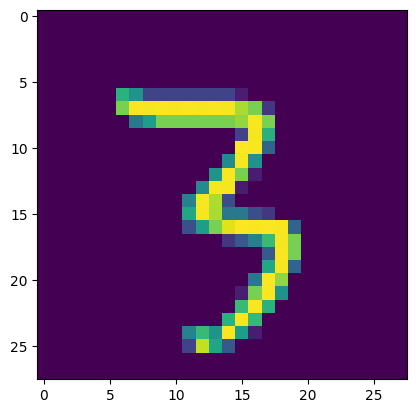

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

random_imageIndex = np.random.randint(100, size=1)
random_image = X[random_imageIndex].reshape(28, 28)
plt.imshow(random_image)
plt.show()

In [ ]:
y[random_imageIndex]

array(['3'], dtype=object)

In [ ]:
train_set_X, test_set_X, train_set_y, test_set_y = X[:60000], X[60000:], y[0:60000], y[60000:]

In [ ]:
### Binary classification for digit 5 only
y_train_5 = (train_set_y == '5')
y_test_5 = (test_set_y == '5')

In [ ]:
y_train_5.shape

(60000,)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42,loss='hinge')
sgd_clf.fit(train_set_X, y_train_5)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict(random_image.reshape(1, -1))

array([False])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, train_set_X, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision', 'recall','precision_macro', 'recall_macro']
cross_val = cross_validate(sgd_clf, train_set_X, y_train_5, cv=3, scoring=scoring)

cross_val

{'fit_time': array([11.80199766, 11.28584981,  8.62598109]),
 'score_time': array([0.1030817 , 0.16292405, 0.10220337]),
 'test_accuracy': array([0.95035, 0.96035, 0.9604 ]),
 'test_precision': array([0.95936795, 0.89060092, 0.74963109]),
 'test_recall': array([0.47039292, 0.63973437, 0.84338683]),
 'test_precision_macro': array([0.95464997, 0.92789591, 0.86693999]),
 'test_recall_macro': array([0.73420707, 0.81596458, 0.90770452])}

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(train_set_X, y_train_5)

DummyClassifier()

In [ ]:
print(any(dummy_clf.predict(train_set_X)))

False


In [ ]:
cross_val_score(dummy_clf, train_set_X, y_train_5, cv=3, scoring='accuracy')

array([0.90965, 0.90965, 0.90965])

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, train_set_X, y_train_5, cv=3)

In [ ]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

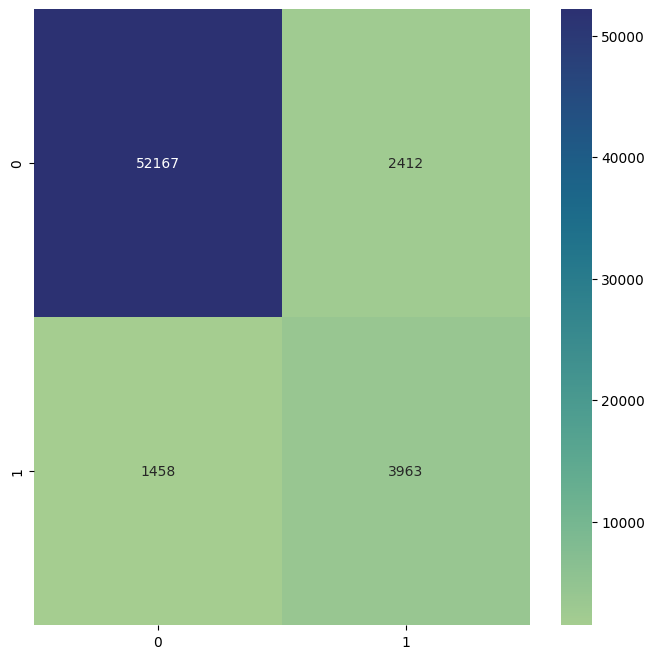

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d',cmap="crest")
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred), f1_score(y_train_5, y_train_pred)

(0.8370879772350012, 0.6511713705958311, 0.7325171197343847)

In [ ]:
sgd_clf = SGDClassifier(random_state=42,loss='log_loss')
sgd_clf.fit(train_set_X, y_train_5)
cross_val = cross_validate(sgd_clf, train_set_X, y_train_5, cv=3, scoring=scoring)
cross_val

{'fit_time': array([21.42818975, 11.14635682, 11.43841147]),
 'score_time': array([0.13244939, 0.10057116, 0.10305405]),
 'test_accuracy': array([0.8865, 0.9579, 0.9621]),
 'test_precision': array([0.44059533, 0.88202692, 0.93168724]),
 'test_recall': array([0.95019369, 0.61649142, 0.62645268]),
 'test_precision_macro': array([0.71750315, 0.92252064, 0.94787716]),
 'test_recall_macro': array([0.91518369, 0.80415073, 0.81094524])}

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, train_set_X, y_train_5, cv=3)
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[52167,  2412],
       [ 1458,  3963]])

In [ ]:
y_scores = cross_val_predict(sgd_clf, train_set_X, y_train_5, cv=3, method='decision_function')

In [ ]:
y_scores

array([  6424.65081082,  -5279.92912336, -17212.61342101, ...,
         2977.27286469, -11245.50736418, -22459.80169242])

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

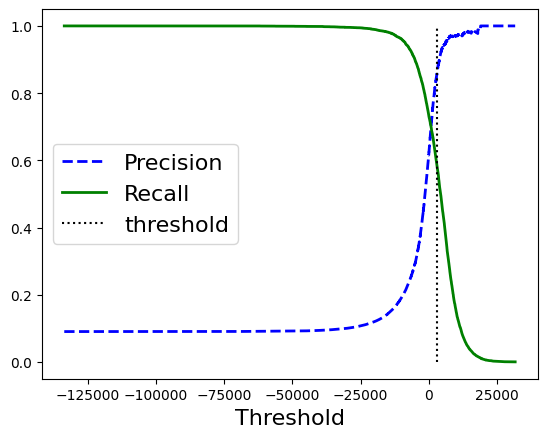

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall', linewidth=2)
plt.vlines(3000, 0, 1.0, "k", "dotted", label="threshold")
plt.xlabel('Threshold', fontsize=16)
plt.legend(fontsize=16)

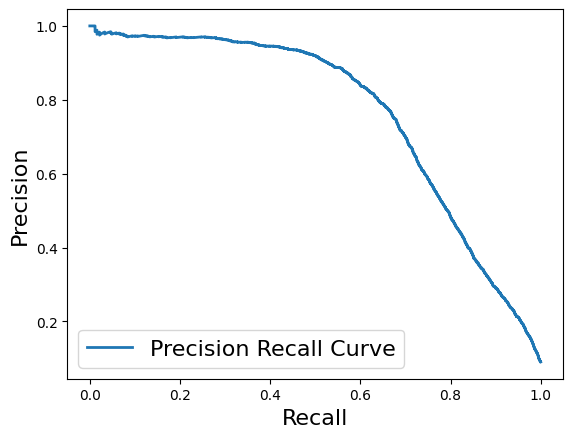

In [ ]:
plt.plot(recalls, precisions, linewidth=2, label='Precision Recall Curve')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(fontsize=16)

In [ ]:
index_for_90_precision = (precisions >= 0.90).argmax()
threshold_for_90_precision = thresholds[index_for_90_precision]
threshold_for_90_precision

3820.534000483421

In [ ]:
from sklearn.metrics import roc_curve
fpt, tpr, thresholds = roc_curve(y_train_5, y_scores)

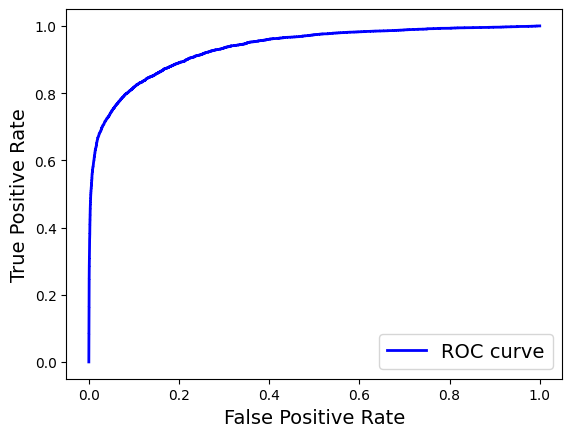

In [ ]:
plt.plot(fpt, tpr, 'b-',linewidth=2, label='ROC curve')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend(fontsize=14)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9349891383545722

In [ ]:
thresholds.shape

(4540,)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(train_set_X, y_train_5)

RandomForestClassifier(random_state=42)

In [ ]:
y_probas_forest = cross_val_predict(random_forest_clf, train_set_X, y_train_5, cv=3, method='predict_proba')

In [ ]:
## first column is probability of negative, and second is postive probability
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [ ]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_probas_forest[:,1])

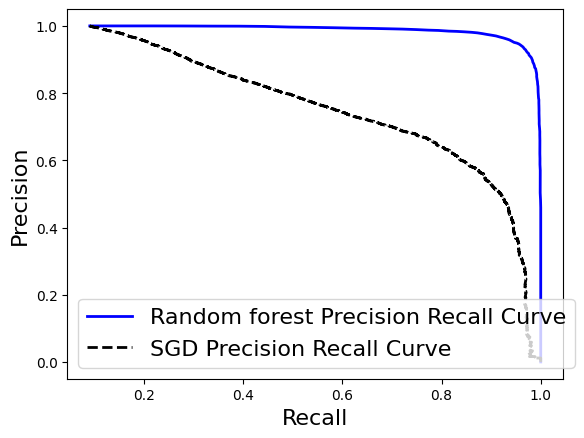

In [ ]:
plt.plot(precisions_forest, recalls_forest, 'b-', linewidth=2, label="Random forest Precision Recall Curve")
plt.plot(precisions, recalls, 'k--', linewidth=2, label='SGD Precision Recall Curve')
plt.xlabel('Recall', fontsize=16)
plt.ylabel('Precision', fontsize=16)
plt.legend(fontsize=16)


In [ ]:
roc_auc_score(y_train_5, y_probas_forest[:,1])

0.9983436731328145

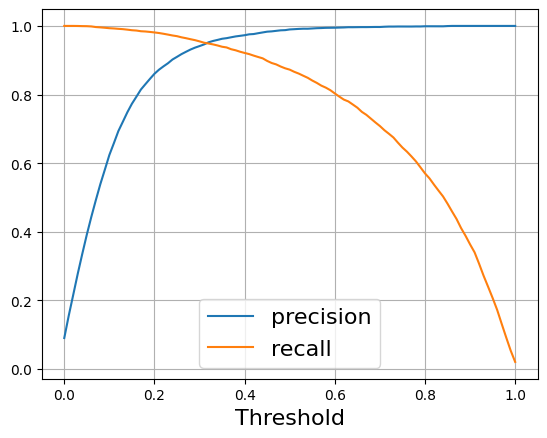

In [ ]:
plt.plot(thresholds_forest, precisions_forest[:-1], label='precision')
plt.plot(thresholds_forest, recalls_forest[:-1], label='recall')
plt.xlabel('Threshold', fontsize=16)
plt.legend(fontsize=16)
plt.grid()


In [ ]:
### Now we use the trained model for the test set and plot roc curves
y_test_5_rdclf_prob = random_forest_clf.predict_proba(test_set_X)
y_test_5_rdclf_prob

array([[1.  , 0.  ],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [0.08, 0.92],
       [1.  , 0.  ]])

In [ ]:
y_test_5 = (test_set_y == '5')
fpr_rdclf, tpr_rdclf, thresholds_rdclf = roc_curve(y_test_5, y_test_5_rdclf_prob[:,1])

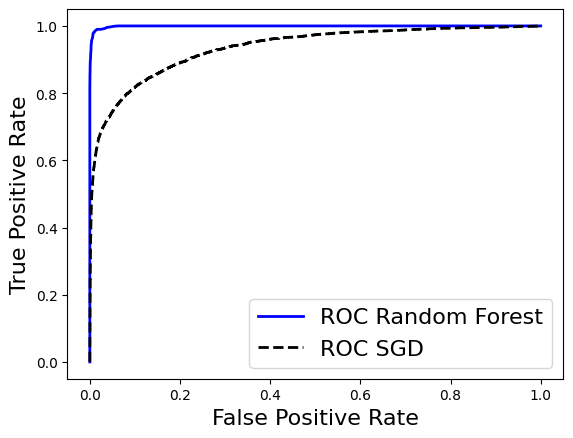

In [ ]:
plt.plot(fpr_rdclf, tpr_rdclf, 'b-', linewidth=2, label='ROC Random Forest')
plt.plot(fpt, tpr, 'k--', linewidth=2, label='ROC SGD')
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(fontsize=16)


In [ ]:
precisions_rdclf, recalls_rdclf, thresholds_rdclf = precision_recall_curve(y_test_5, y_test_5_rdclf_prob[:,1])

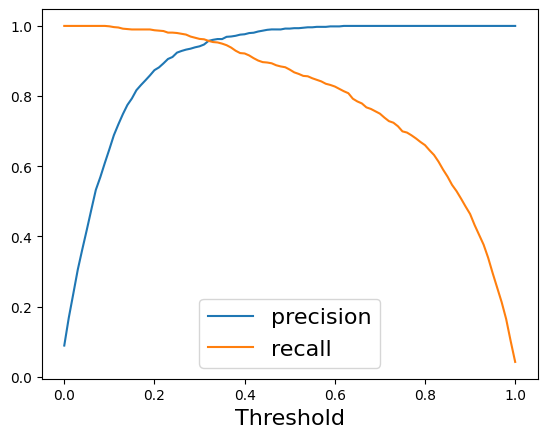

In [ ]:
plt.plot(thresholds_rdclf, precisions_rdclf[:-1], label='precision')
plt.plot(thresholds_rdclf, recalls_rdclf[:-1], label='recall')
plt.xlabel('Threshold', fontsize=16)
plt.legend(fontsize=16)

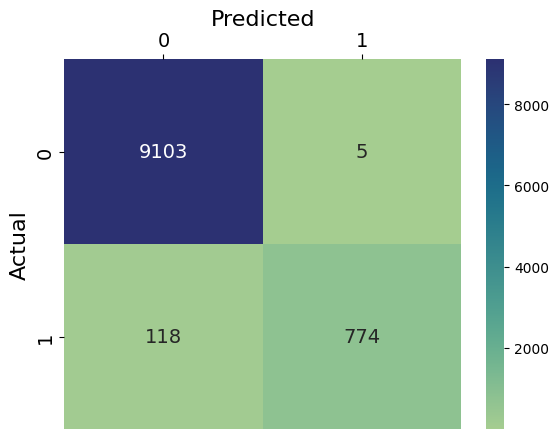

In [ ]:
## confusion matrix for data predicted from random forest classification model
y_test_5_rdclf = random_forest_clf.predict(test_set_X)

def cmplot(y_label, y_lable_pred):
  cm_rdclf = confusion_matrix(y_label, y_lable_pred)
  sns.heatmap(cm_rdclf, annot=True, fmt='d', cmap='crest', annot_kws={"size": 14})
  plt.gca().xaxis.set_label_position('top')  # Move the label to the top
  plt.gca().xaxis.tick_top()  # Move the ticks to the top
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('Actual', fontsize=16)
  # Adjust the font size of x and y ticks
  plt.xticks(fontsize=14)  # Set x-tick font size
  plt.yticks(fontsize=14)  # Set y-tick font size
  plt.show()

cmplot(y_test_5, y_test_5_rdclf)


In [ ]:
f1_score(y_test_5, y_test_5_rdclf)

0.926391382405745

In [ ]:
### binary label mode has been developed for image label of 5 only. There are 10 digits from 0 to 9 in the mnist dataset.
### Develope a randon forest classification model to predict all 10 handwritten labels from 0 to 9

random_10clf = RandomForestClassifier(n_estimators=50,
                                      max_leaf_nodes=16,
                                      n_jobs=-1,
                                      random_state=42)
random_10clf.fit(train_set_X, train_set_y)



RandomForestClassifier(max_leaf_nodes=16, n_estimators=50, n_jobs=-1,
                       random_state=42)

In [ ]:
### check classed trained in the model
random_10clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

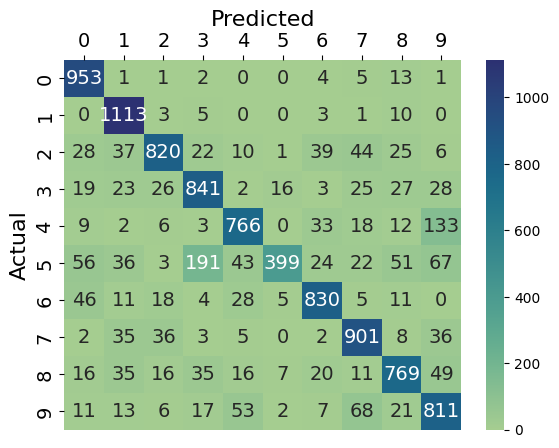

In [ ]:
### predict test set and calculate confusion matrix
test_set_y_pred = random_10clf.predict(test_set_X)
cmplot(test_set_y, test_set_y_pred)


In [ ]:
### Look for the best hyperparameters using random CV search
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import fetch_openml

param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50, 60],
    'max_leaf_nodes': [None, 5, 10, 15, 20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

rd_clf10_esitmator = RandomForestClassifier(random_state=42)

### make randomsearchCV. the first scoring metrics will be used if not specified in refit
scoring=['accuracy', 'precision', 'recall']
random_search = RandomizedSearchCV(rd_clf10_esitmator,
                                   param_distributions=param_distributions,
                                   refit='accuracy', cv=3, scoring=scoring,
                                   n_iter=30, n_jobs=-1, random_state=42,return_train_score=True)



mnist = fetch_openml('mnist_784', as_frame=False)

X, y = mnist.data, mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [ ]:
### logsiticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,test_size=0.2, random_state=0.2)

lclf = LogisticRegression(random_state=42)

scoring=['accuracy', 'precision', 'recall']

paraset = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03, 4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02, 2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00, 1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02, 5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04],
    }

random_search = RandomizedSearchCV(lclf,
                                   refit='accuracy',
                                   cv=10,
                                   scoring=scoring,
                                   n_iter=30,
                                   return_train_score=True,
                                   param_distributions=paraset)


